In [1]:
%pip install imageio
%pip install scipy
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_image-0.25.2-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.25.2-cp312-cp312-win_amd64.whl (12.9 MB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 991.0 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/2.0 MB 1.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.0 MB 1.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.0 MB 1.8 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.0 MB 2.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/2.0 MB 3.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/2.0 MB 3.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/2.0 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. VIẾT CHƯƠNG TRÌNH XỬ LÍ ẢNH CƠ BẢN

2.1. Nạp ảnh sử dụng thư viện Python Image Library (PIL)

In [2]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

2.2. Nạp ảnh sử dụng lệnh thư viên imageio

- Add thư viện matplotlib

In [4]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


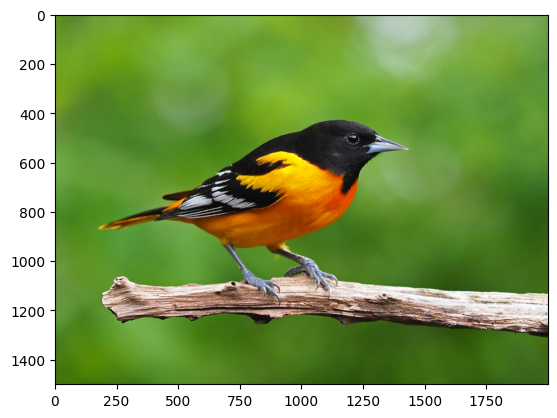

(1500, 2000, 3)

In [5]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()
data.shape

2.3. Độ phân giải ảnh

- Viết chương trình nạp ảnh màu và chuyển sang ảnh grayscale

(1500, 2000)

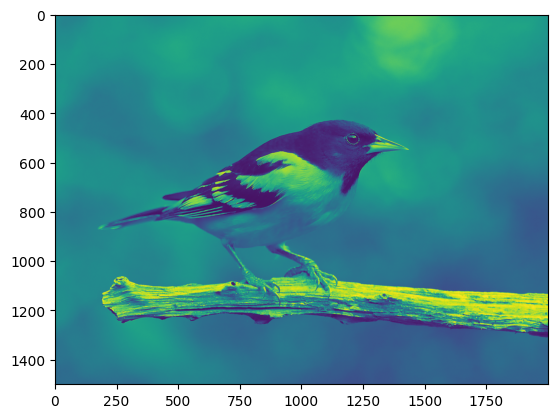

In [6]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode = 'L')
plt.imshow(data)
plt.show
data.shape

- Viết chương trình nạp ảnh grayscale và giảm 4 bit thấp , giữ 4 bit cao. Lưu ảnh với tên là birdF0.png

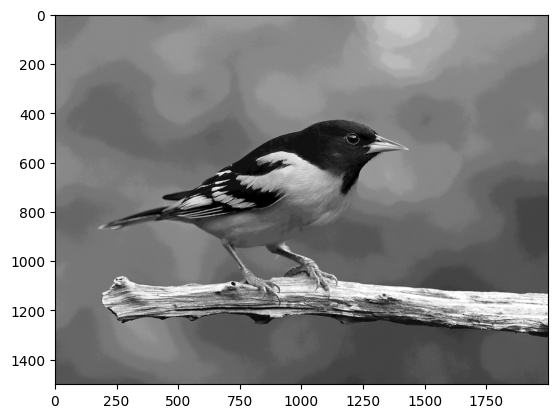

(1500, 2000)

In [7]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdF0.png', cl)
tmp = iio.imread('birdF0.png')
plt.imshow(tmp, cmap='gray') #cmap='gray' dùng để chuyển đổi ảnh thành trắng đen, defaut có màu là do colormap tự động
plt.show()
data.shape

2.4. Màu sắc với hệ RGB

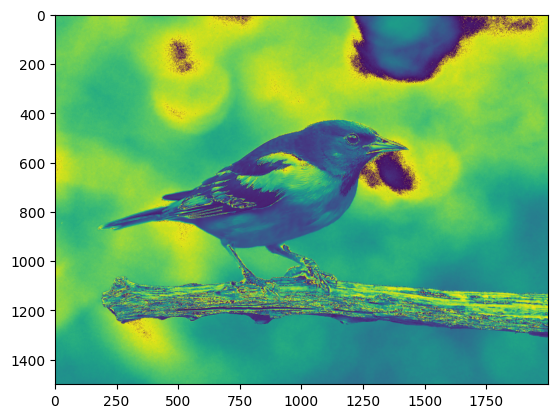

(1500, 2000, 3)

In [8]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()
data.shape

2.5. Màu sắc với hệ HSV

In [9]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
a = colorsys.rgb_to_hsv(255,0,0)
print(a)
b = colorsys.rgb_to_hsv(1,0,0)
print(b)
c = colorsys.rgb_to_hsv(0,255,0)
print(c)
d = colorsys.hsv_to_rgb(1,1,255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


2.6. Ứng dụng chuyển đổi hệ màu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


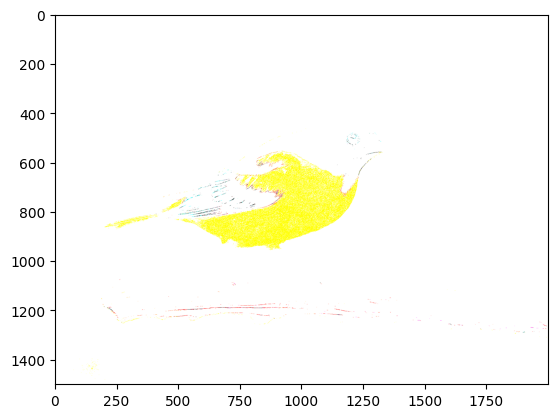

(1500, 2000, 3)

In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h,s,v)
rgb2 = np.array(rgb2).transpose((1,2,0))
plt.imshow(rgb2)
plt.show()
data.shape

3. Bài Tập

1. Viết chương trình nạp 1 ảnh và lưu thành 3 ảnh với 3 màu khác nhau

In [11]:
from PIL import Image
import numpy as np
img = Image.open('./exercise/flower.jpeg')
img.show()

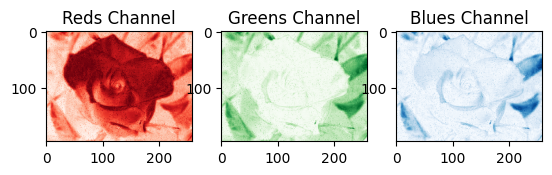

(195, 259, 3)

In [12]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('./exercise/flower.jpeg')
plt.subplot(1,3,1)
plt.title("Reds Channel")
plt.imshow(data[:,:,0], cmap='Reds')
plt.subplot(1,3,2)
plt.title("Greens Channel")
plt.imshow(data[:,:,1], cmap='Greens')
plt.subplot(1,3,3)
plt.title("Blues Channel")
plt.imshow(data[:,:,2], cmap='Blues')
plt.show()
data.shape

2. Viết chương trình nạp một ảnh và hoán đổi giá trị các màu. Lưu các ảnh vào máy 

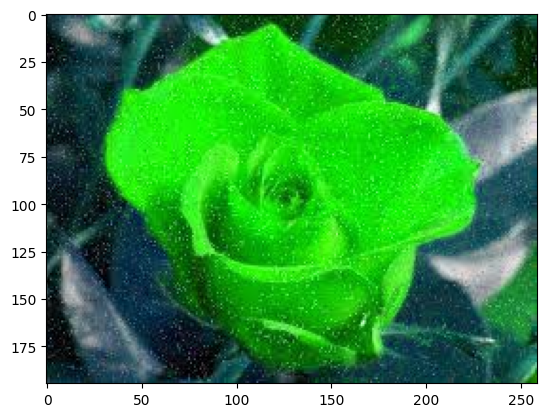

In [13]:
data = iio.imread('./exercise/flower.jpeg')
swapped = data[:,:,[2,0,1]]
iio.imwrite('flower_swap.jpeg', swapped)
plt.imshow(swapped)
plt.show()

3. Nạp một ảnh , chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau

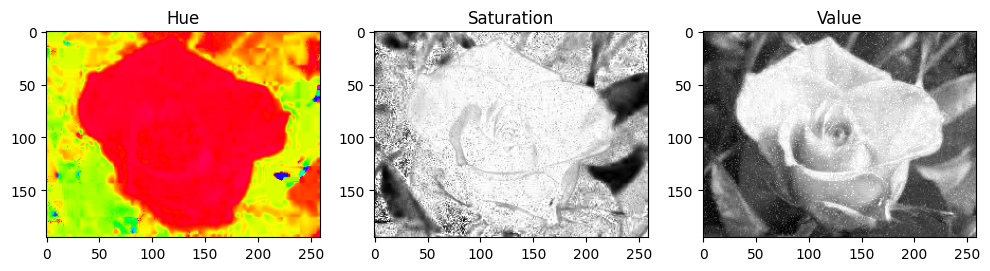

In [14]:
import imageio.v3 as iio
import numpy as np
import colorsys
import matplotlib.pyplot as plt
from PIL import Image

img = iio.imread('exercise/flower.jpeg')

rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
r = img[:, :, 0] / 255.0
g = img[:, :, 1] / 255.0
b = img[:, :, 2] / 255.0

h, s, v = rgb2hsv(r, g, b)

h_img = (h * 255).astype(np.uint8)
s_img = (s * 255).astype(np.uint8)
v_img = (v * 255).astype(np.uint8)

iio.imwrite('flower_H.png', h_img)
iio.imwrite('flower_S.png', s_img)
iio.imwrite('flower_V.png', v_img)

# Hiển thị ảnh HSV
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Hue")
plt.imshow(h_img, cmap='hsv')
plt.subplot(1, 3, 2)
plt.title("Saturation")
plt.imshow(s_img, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Value")
plt.imshow(v_img, cmap='gray')
plt.show()

4. Viết chương trình nạp một ảnh , chuyển hệ màu HSV . Lưu ảnh mới với kênh Hnew = 1/3 , Hold , Vnew = 3/4 Vold

In [1]:
import imageio.v3 as iio
import numpy as np
import colorsys

img_rgb = iio.imread("exercise/flower.jpeg") / 255.0
r, g, b = img_rgb[..., 0], img_rgb[..., 1], img_rgb[..., 2]

rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb_to_hsv(r, g, b)

h = h / 3.0
v = v * 0.75

hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)
r, g, b = hsv_to_rgb(h, s, v)

rgb_new = np.dstack((r, g, b)) * 255
rgb_new = rgb_new.astype(np.uint8)

iio.imwrite("flower_modified.jpeg", rgb_new)